# Machine Learning for Everybody – Full Course

# FCC Magic

https://youtu.be/i_LwzRVP7bg


### Magic Dataset, source
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

In [1]:
!curl --create-dir -O --output-dir ./data https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1442k  100 1442k    0     0   216k      0  0:00:06  0:00:06 --:--:--  337k


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
# 1. fLength: continuous # major axis of ellipse [mm]
# 2. fWidth: continuous # minor axis of ellipse [mm]
# 3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
# 4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
# 5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
# 6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
# 7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
# 8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
# 9. fAlpha: continuous # angle of major axis with vector to origin [deg]
# 10. fDist: continuous # distance from origin to center of ellipse [mm]
# 11. class: g,h # gamma (signal), hadron (background)

cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('data/magic04.data', names=cols)
df.head()

df['class'] = df['class'].map({'g': 1, 'h': 0})

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

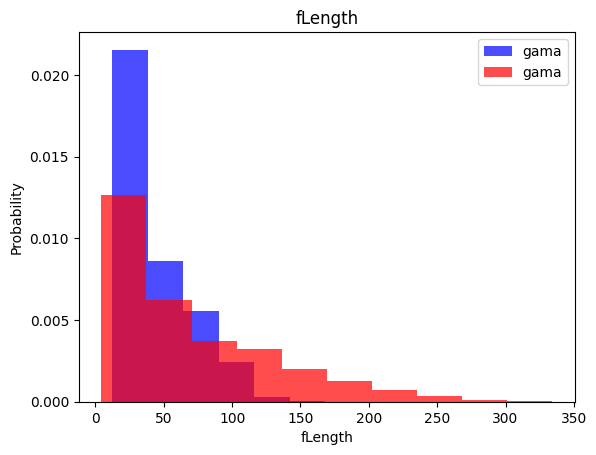

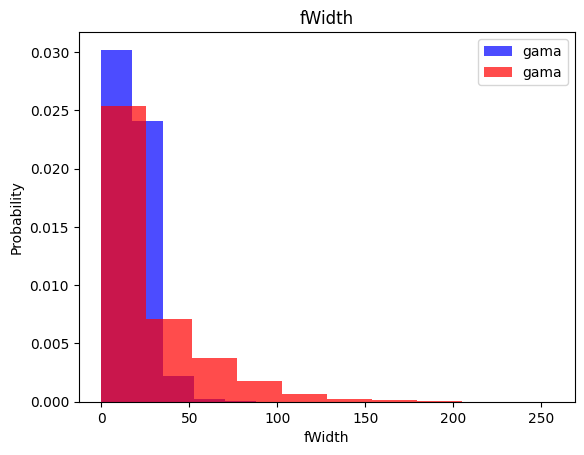

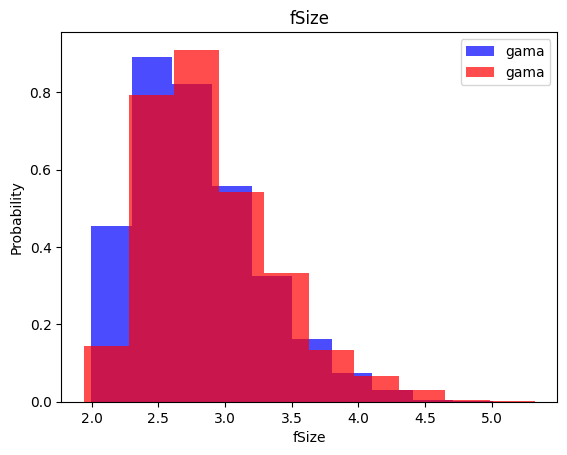

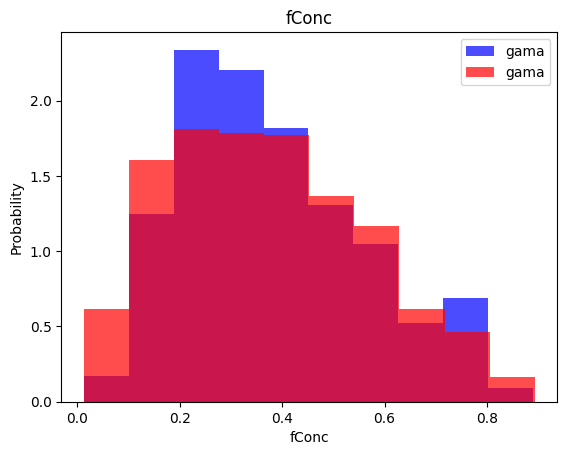

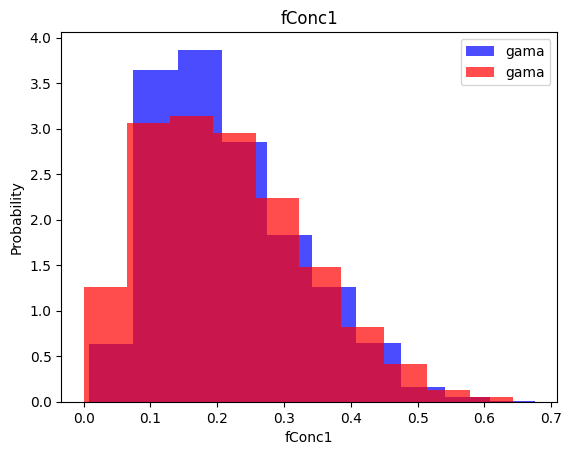

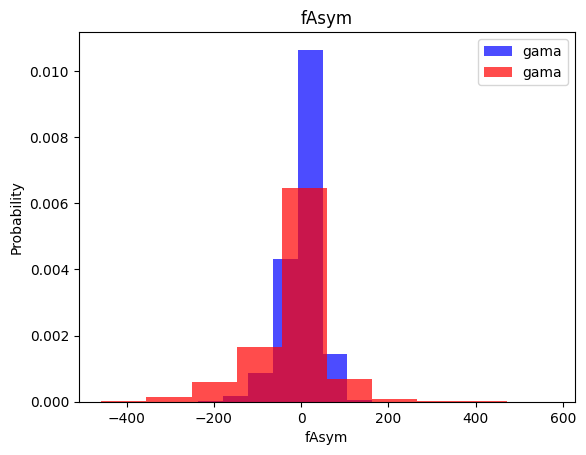

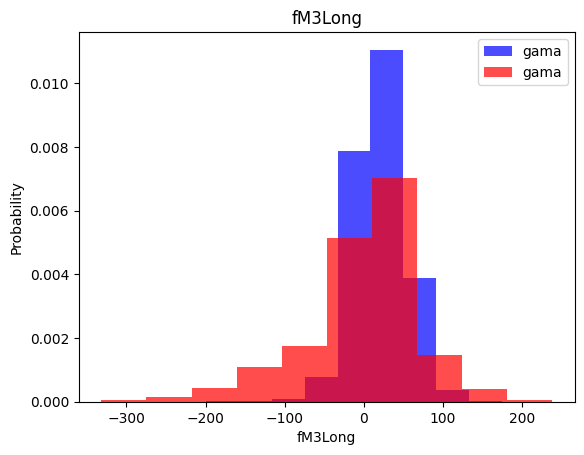

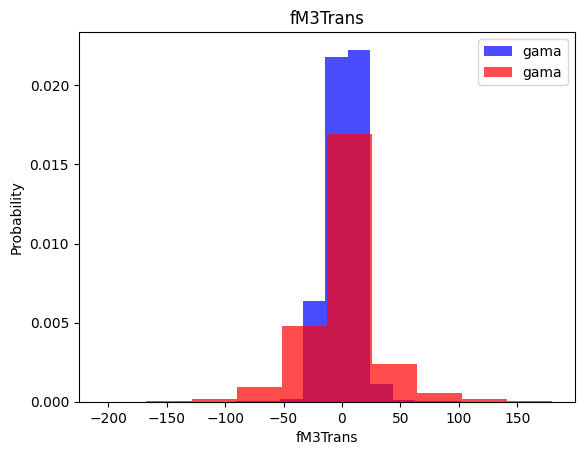

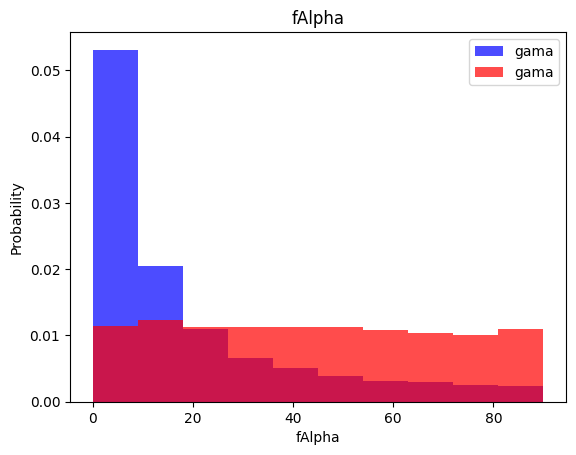

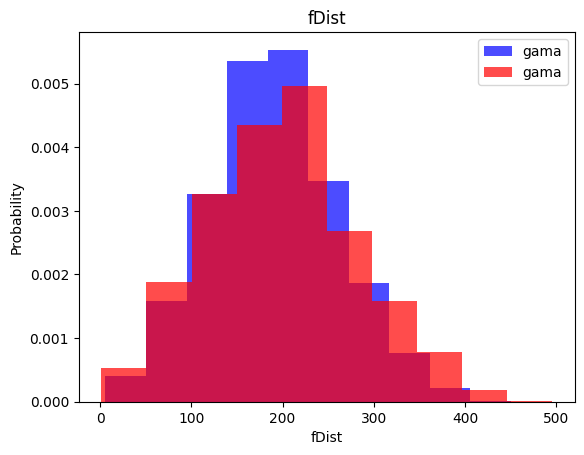

In [4]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gama", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="gama", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()    

### Train, validation, test datasets

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [6]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

print("gama", sum(y_train==1))
print("hadron", sum(y_train==0))

gama 7437
hadron 7437


## kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1342
           1       0.84      0.86      0.85      2462

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [11]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1342
           1       0.73      0.91      0.81      2462

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



## Logistic Regression


In [12]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [13]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1342
           1       0.85      0.83      0.84      2462

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machines (SVM)

In [14]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)

In [15]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1342
           1       0.89      0.92      0.90      2462

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



## Neural Networks

In [16]:
import tensorflow as tf

# Disable all GPUS, TF Metal is very slow
# https://stackoverflow.com/questions/70653251/why-gpu-is-3-5-times-slower-than-the-cpu-on-apple-m1-mac
tf.config.set_visible_devices([], 'GPU')

def train_model(X_train, y_train, X_val, y_val, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0
    )
    
    return nn_model, history

In [17]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

16 nodes, 0 dropout, 0.1 lr, 32 batch_size


2023-06-07 09:06:41.533745: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


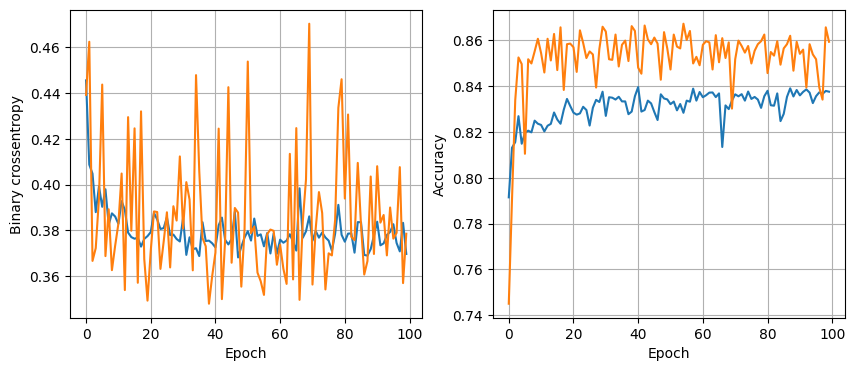

119/119 [==============================] - 0s 387us/step - loss: 0.3698 - accuracy: 0.8544
val_loss: 0.36978667974472046, time taken: 0:00:20.426262
16 nodes, 0 dropout, 0.1 lr, 64 batch_size


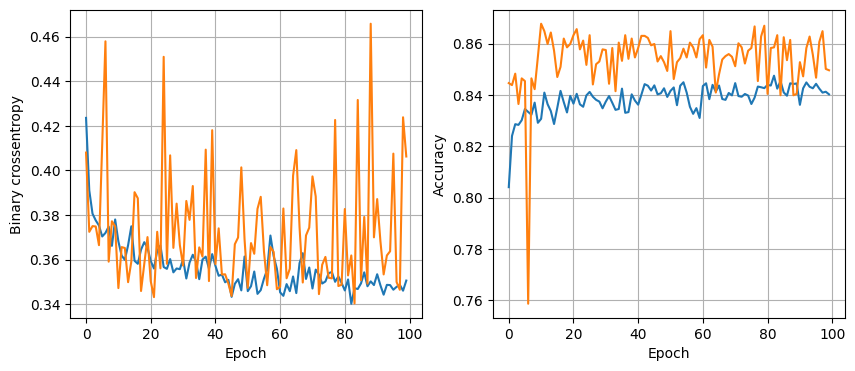

119/119 [==============================] - 0s 386us/step - loss: 0.3720 - accuracy: 0.8578
val_loss: 0.37196585536003113, time taken: 0:00:11.303115
16 nodes, 0 dropout, 0.1 lr, 128 batch_size


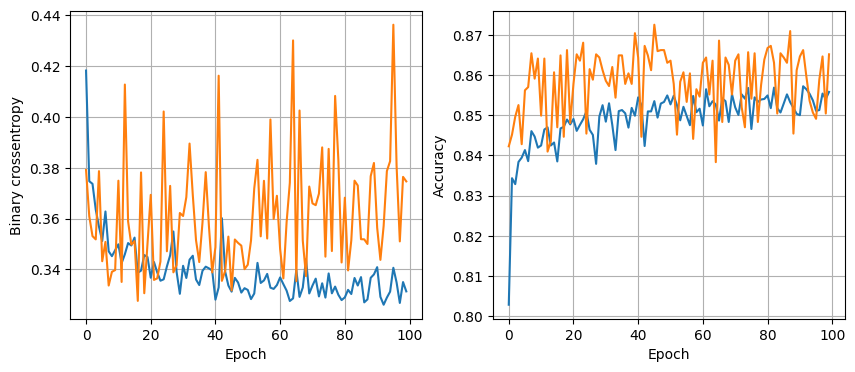

119/119 [==============================] - 0s 423us/step - loss: 0.3448 - accuracy: 0.8607
val_loss: 0.3448372185230255, time taken: 0:00:06.739221
16 nodes, 0 dropout, 0.005 lr, 32 batch_size


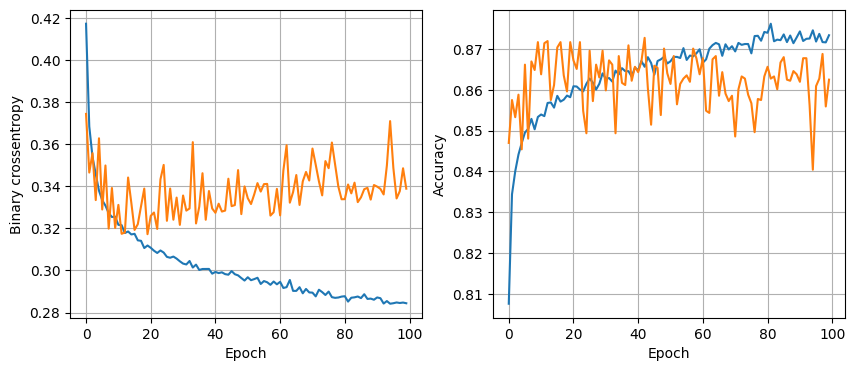

119/119 [==============================] - 0s 377us/step - loss: 0.3290 - accuracy: 0.8575
val_loss: 0.32897278666496277, time taken: 0:00:21.918421
16 nodes, 0 dropout, 0.005 lr, 64 batch_size


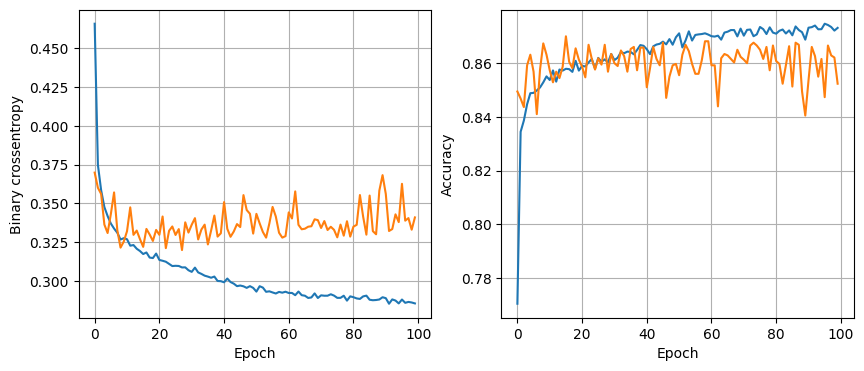

119/119 [==============================] - 0s 403us/step - loss: 0.3340 - accuracy: 0.8549
val_loss: 0.3340340852737427, time taken: 0:00:12.555651
16 nodes, 0 dropout, 0.005 lr, 128 batch_size


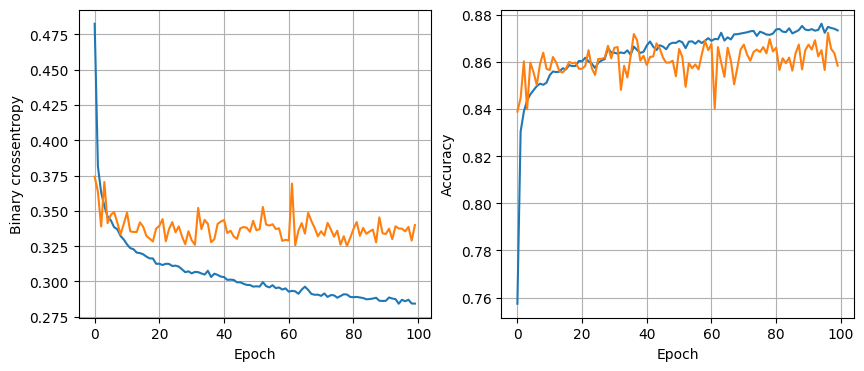

119/119 [==============================] - 0s 419us/step - loss: 0.3200 - accuracy: 0.8617
val_loss: 0.31998780369758606, time taken: 0:00:06.946308
16 nodes, 0 dropout, 0.001 lr, 32 batch_size


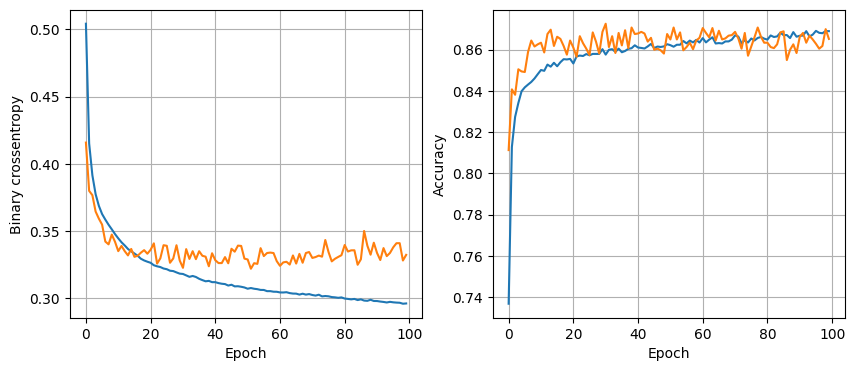

119/119 [==============================] - 0s 395us/step - loss: 0.3208 - accuracy: 0.8625
val_loss: 0.320791095495224, time taken: 0:00:22.777302
16 nodes, 0 dropout, 0.001 lr, 64 batch_size


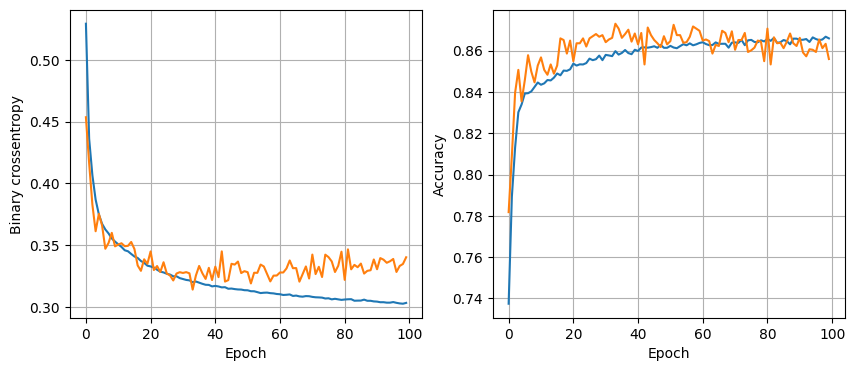

119/119 [==============================] - 0s 400us/step - loss: 0.3360 - accuracy: 0.8533
val_loss: 0.3360389471054077, time taken: 0:00:12.328603
16 nodes, 0 dropout, 0.001 lr, 128 batch_size


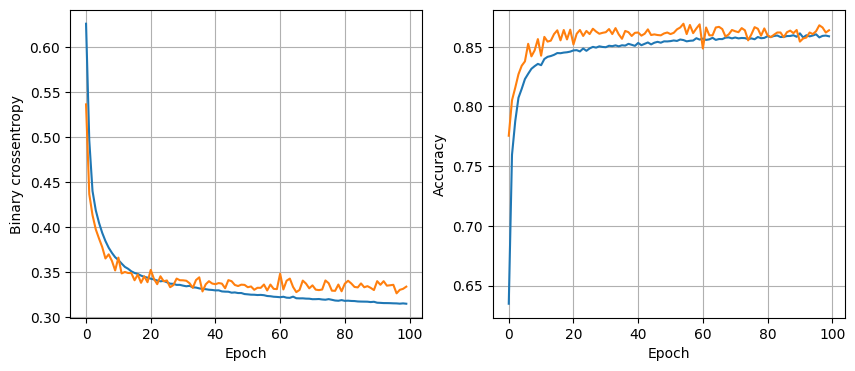

119/119 [==============================] - 0s 396us/step - loss: 0.3229 - accuracy: 0.8636
val_loss: 0.32291680574417114, time taken: 0:00:06.814044
16 nodes, 0.2 dropout, 0.1 lr, 32 batch_size


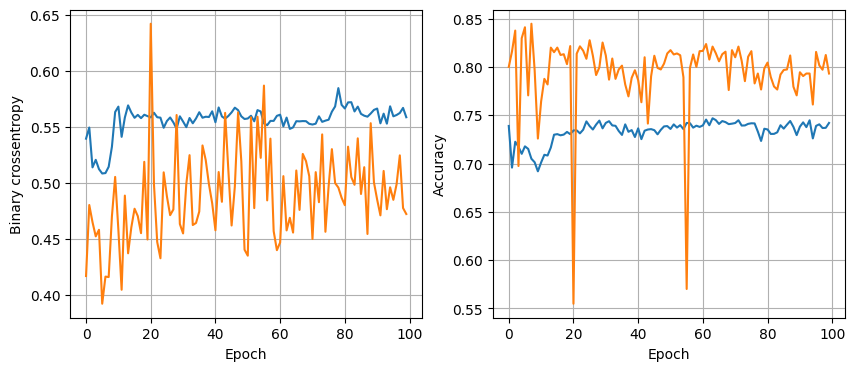

119/119 [==============================] - 0s 468us/step - loss: 0.4769 - accuracy: 0.7839
val_loss: 0.4768534004688263, time taken: 0:00:22.949708
16 nodes, 0.2 dropout, 0.1 lr, 64 batch_size


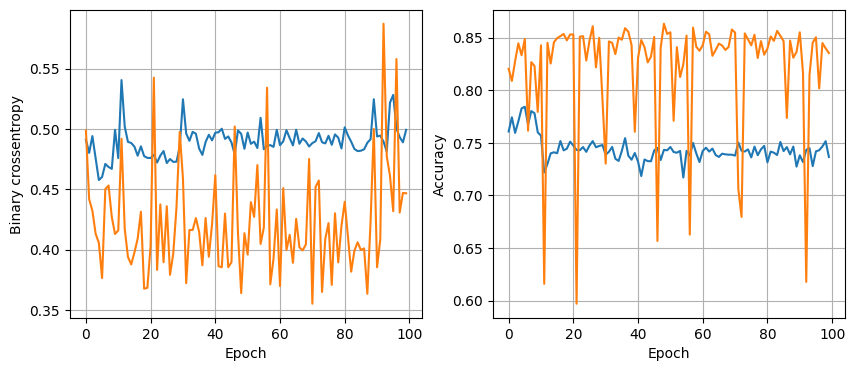

119/119 [==============================] - 0s 403us/step - loss: 0.4410 - accuracy: 0.8349
val_loss: 0.44096216559410095, time taken: 0:00:12.447509
16 nodes, 0.2 dropout, 0.1 lr, 128 batch_size


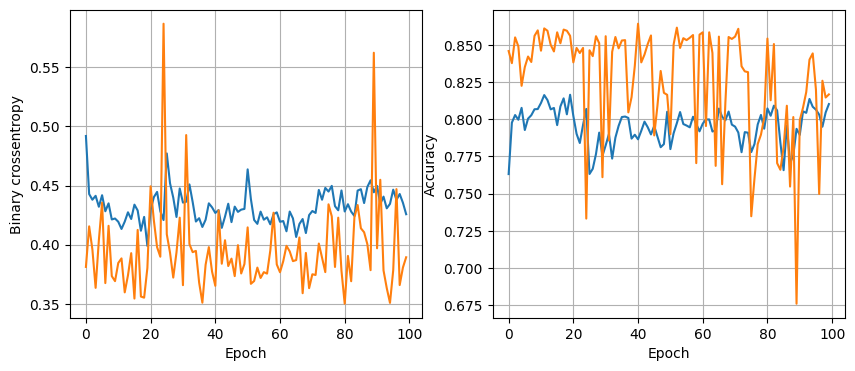

119/119 [==============================] - 0s 406us/step - loss: 0.3766 - accuracy: 0.8091
val_loss: 0.37663087248802185, time taken: 0:00:07.205147
16 nodes, 0.2 dropout, 0.005 lr, 32 batch_size


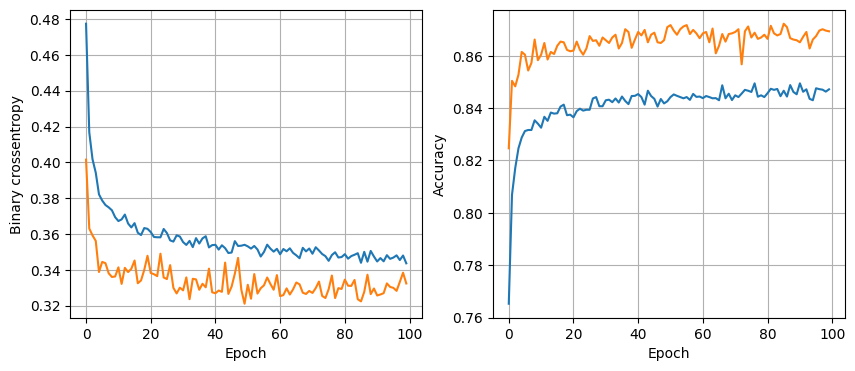

119/119 [==============================] - 0s 393us/step - loss: 0.3247 - accuracy: 0.8630
val_loss: 0.3246908187866211, time taken: 0:00:21.776419
16 nodes, 0.2 dropout, 0.005 lr, 64 batch_size


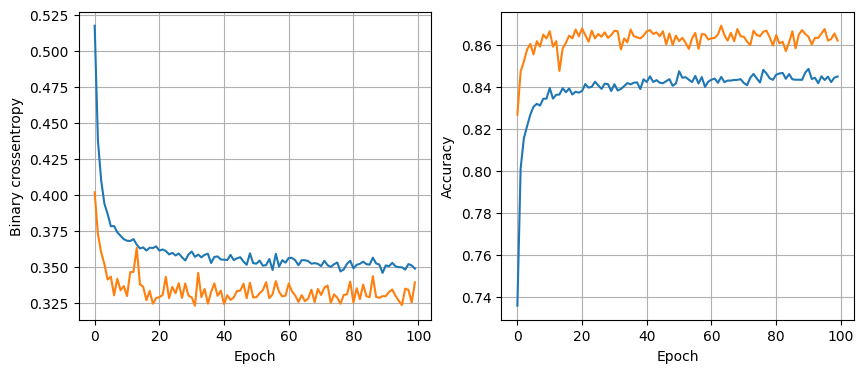

119/119 [==============================] - 0s 415us/step - loss: 0.3333 - accuracy: 0.8644
val_loss: 0.333292692899704, time taken: 0:00:12.516027
16 nodes, 0.2 dropout, 0.005 lr, 128 batch_size


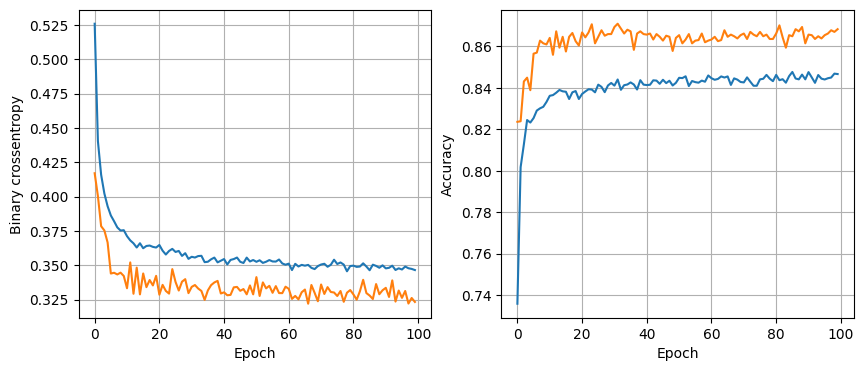

119/119 [==============================] - 0s 408us/step - loss: 0.3201 - accuracy: 0.8696
val_loss: 0.3200724720954895, time taken: 0:00:07.235226
16 nodes, 0.2 dropout, 0.001 lr, 32 batch_size


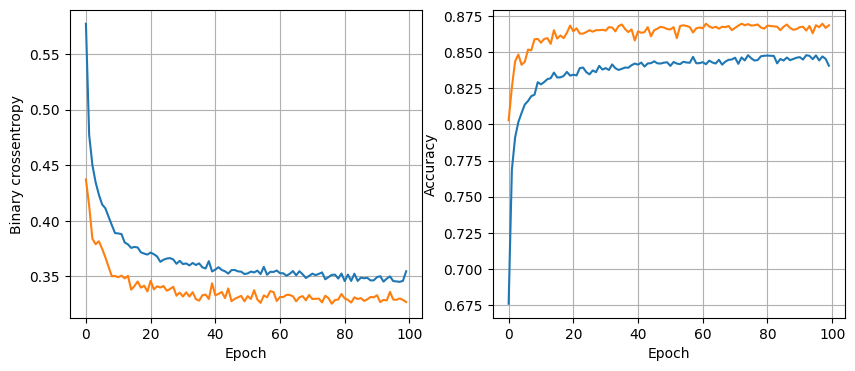

119/119 [==============================] - 0s 489us/step - loss: 0.3219 - accuracy: 0.8654
val_loss: 0.32187125086784363, time taken: 0:00:22.308633
16 nodes, 0.2 dropout, 0.001 lr, 64 batch_size


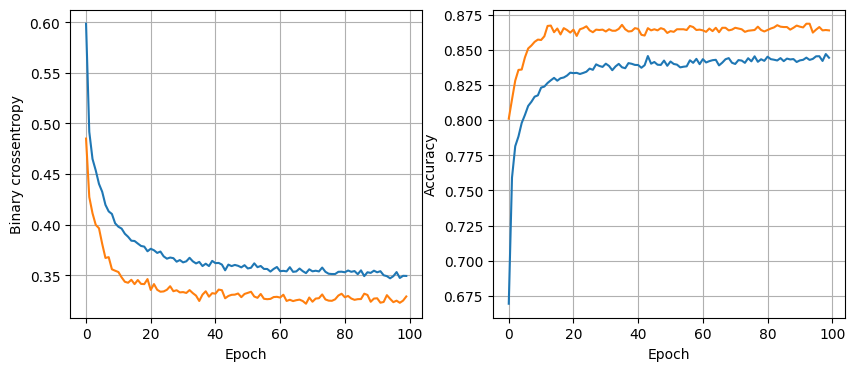

119/119 [==============================] - 0s 373us/step - loss: 0.3267 - accuracy: 0.8615
val_loss: 0.3266642987728119, time taken: 0:00:11.485058
16 nodes, 0.2 dropout, 0.001 lr, 128 batch_size


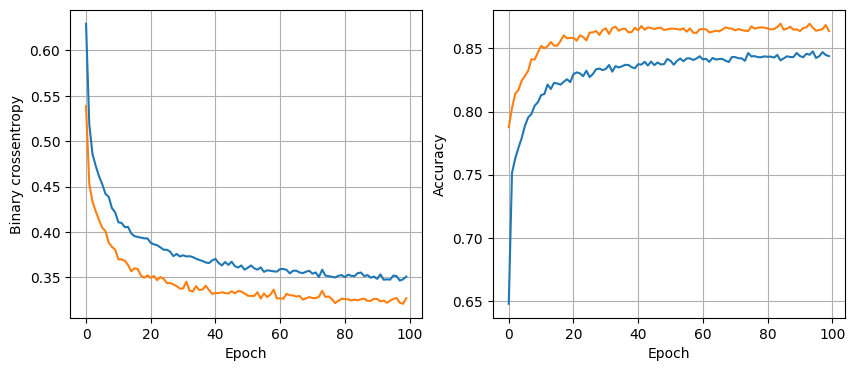

119/119 [==============================] - 0s 379us/step - loss: 0.3214 - accuracy: 0.8675
val_loss: 0.3213568329811096, time taken: 0:00:06.887087
32 nodes, 0 dropout, 0.1 lr, 32 batch_size


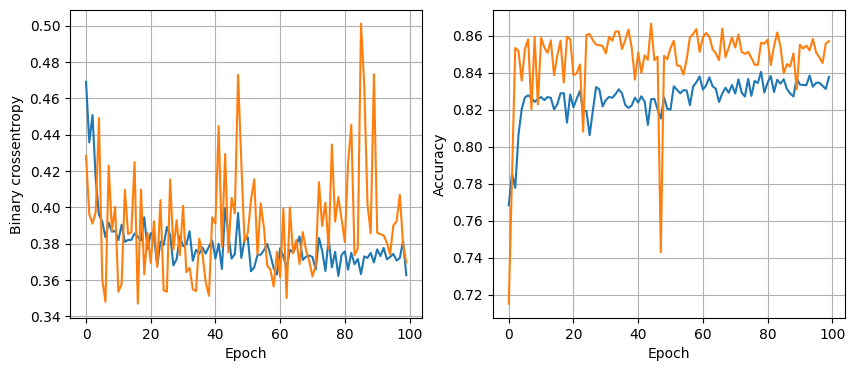

119/119 [==============================] - 0s 525us/step - loss: 0.3564 - accuracy: 0.8541
val_loss: 0.3563721776008606, time taken: 0:00:28.429072
32 nodes, 0 dropout, 0.1 lr, 64 batch_size


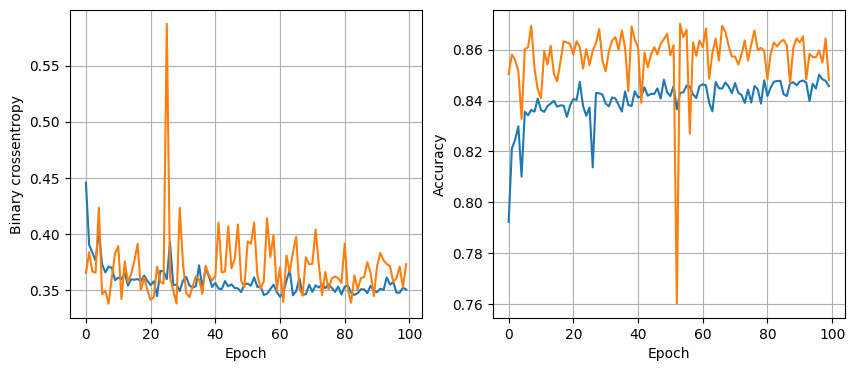

119/119 [==============================] - 0s 411us/step - loss: 0.3460 - accuracy: 0.8565
val_loss: 0.34602248668670654, time taken: 0:00:15.055052
32 nodes, 0 dropout, 0.1 lr, 128 batch_size


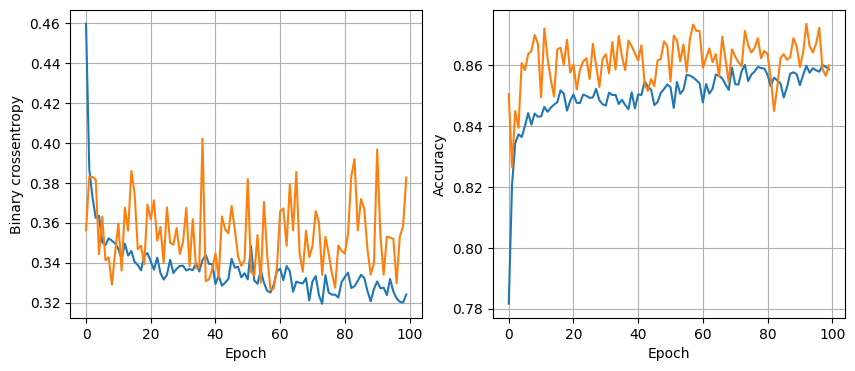

119/119 [==============================] - 0s 417us/step - loss: 0.3559 - accuracy: 0.8601
val_loss: 0.3559168577194214, time taken: 0:00:09.019727
32 nodes, 0 dropout, 0.005 lr, 32 batch_size


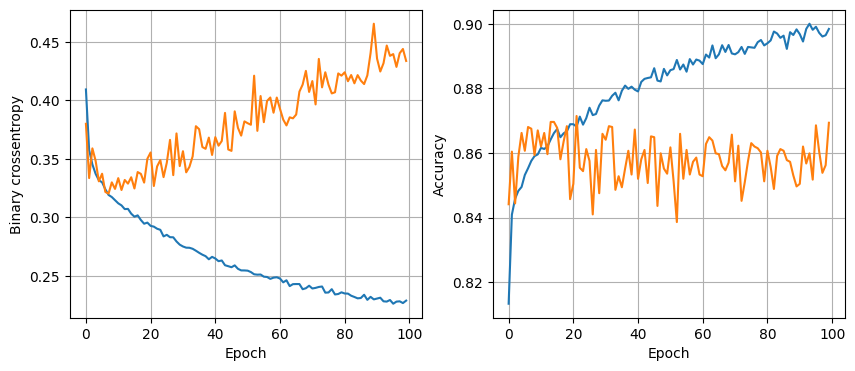

119/119 [==============================] - 0s 555us/step - loss: 0.4030 - accuracy: 0.8594
val_loss: 0.4030016362667084, time taken: 0:00:28.037538
32 nodes, 0 dropout, 0.005 lr, 64 batch_size


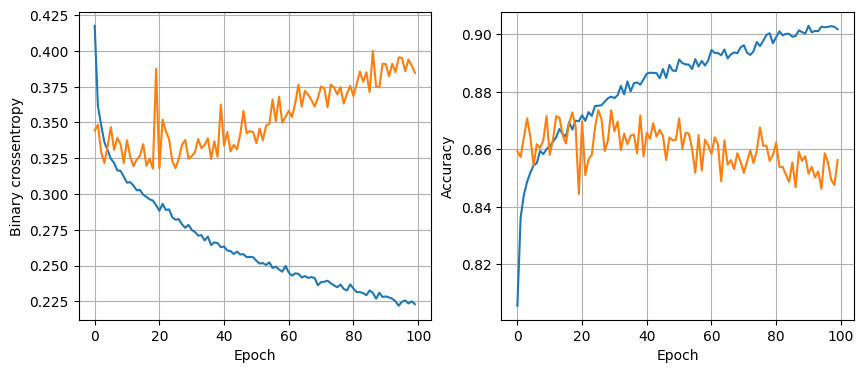

119/119 [==============================] - 0s 412us/step - loss: 0.3591 - accuracy: 0.8628
val_loss: 0.35914191603660583, time taken: 0:00:14.566773
32 nodes, 0 dropout, 0.005 lr, 128 batch_size


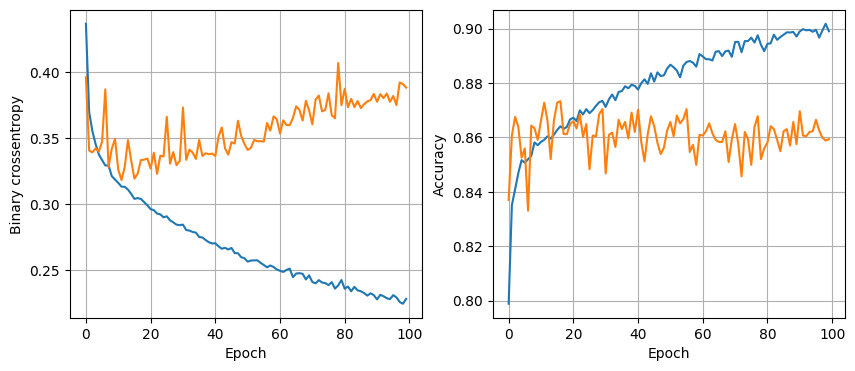

119/119 [==============================] - 0s 418us/step - loss: 0.3936 - accuracy: 0.8465
val_loss: 0.39364802837371826, time taken: 0:00:08.482993
32 nodes, 0 dropout, 0.001 lr, 32 batch_size


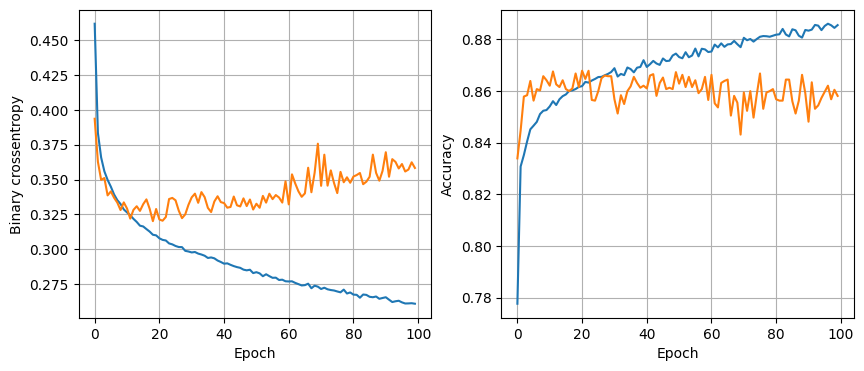

119/119 [==============================] - 0s 418us/step - loss: 0.3276 - accuracy: 0.8580
val_loss: 0.3276364803314209, time taken: 0:00:27.485386
32 nodes, 0 dropout, 0.001 lr, 64 batch_size


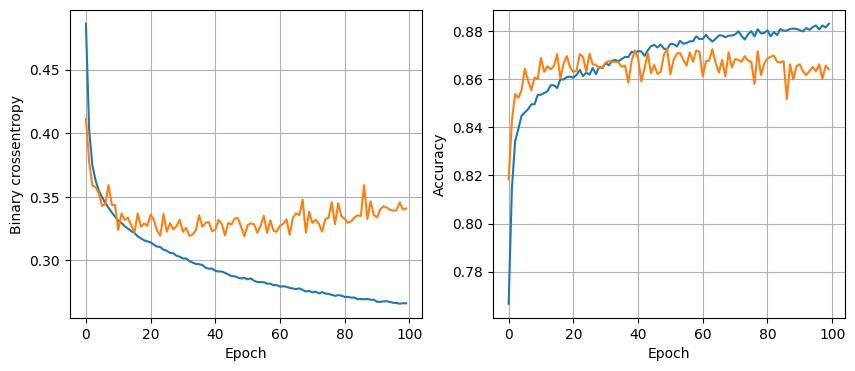

119/119 [==============================] - 0s 409us/step - loss: 0.3302 - accuracy: 0.8599
val_loss: 0.33015793561935425, time taken: 0:00:14.570650
32 nodes, 0 dropout, 0.001 lr, 128 batch_size


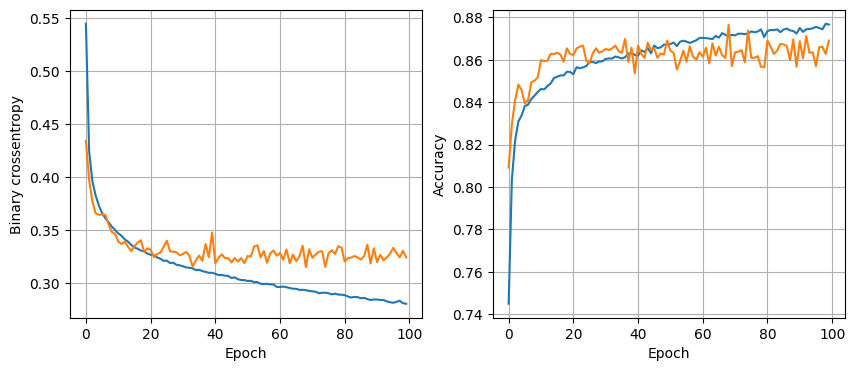

119/119 [==============================] - 0s 409us/step - loss: 0.3241 - accuracy: 0.8604
val_loss: 0.32413145899772644, time taken: 0:00:08.339844
32 nodes, 0.2 dropout, 0.1 lr, 32 batch_size


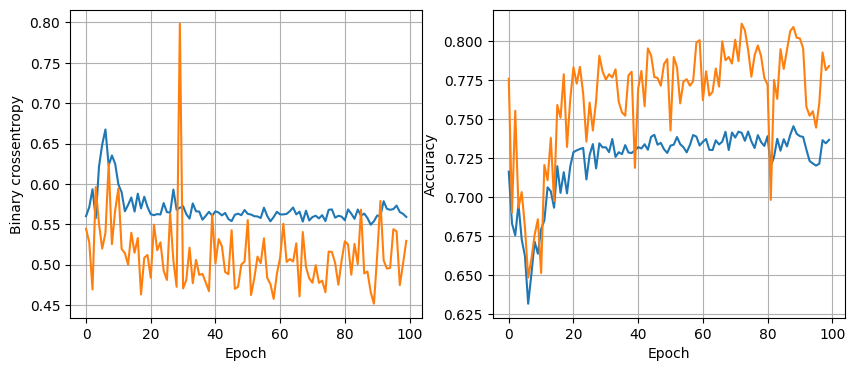

119/119 [==============================] - 0s 390us/step - loss: 0.5275 - accuracy: 0.7813
val_loss: 0.5274842381477356, time taken: 0:00:28.101264
32 nodes, 0.2 dropout, 0.1 lr, 64 batch_size


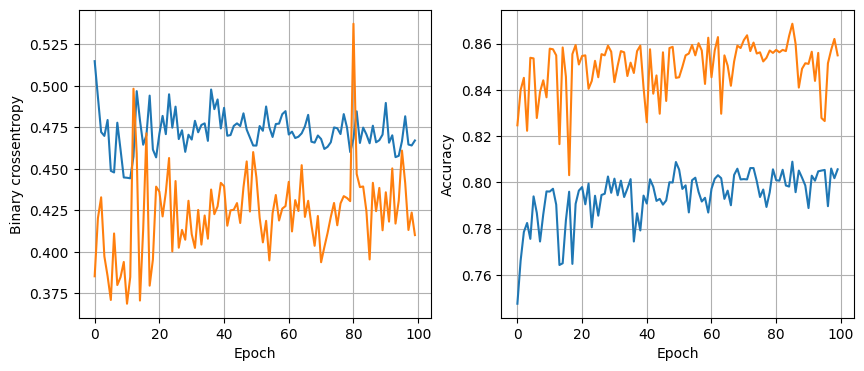

119/119 [==============================] - 0s 414us/step - loss: 0.4044 - accuracy: 0.8562
val_loss: 0.40443184971809387, time taken: 0:00:14.804526
32 nodes, 0.2 dropout, 0.1 lr, 128 batch_size


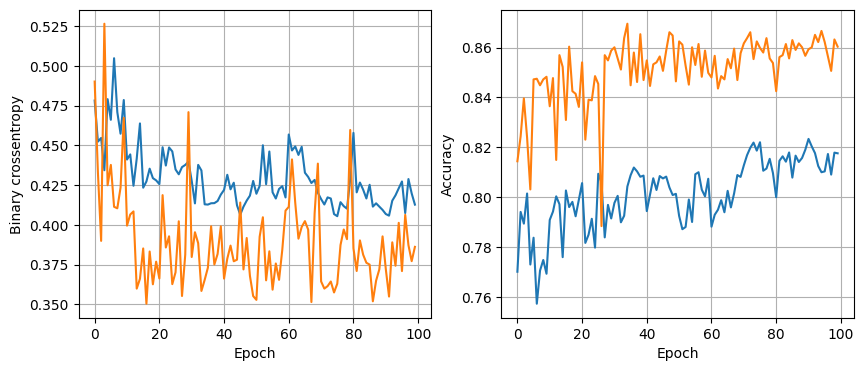

119/119 [==============================] - 0s 393us/step - loss: 0.3755 - accuracy: 0.8601
val_loss: 0.37545737624168396, time taken: 0:00:08.627767
32 nodes, 0.2 dropout, 0.005 lr, 32 batch_size


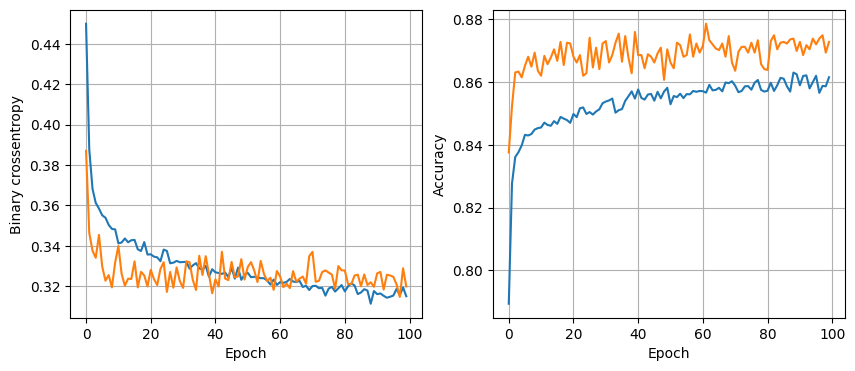

119/119 [==============================] - 0s 414us/step - loss: 0.3092 - accuracy: 0.8722
val_loss: 0.3092019259929657, time taken: 0:00:27.755882
32 nodes, 0.2 dropout, 0.005 lr, 64 batch_size


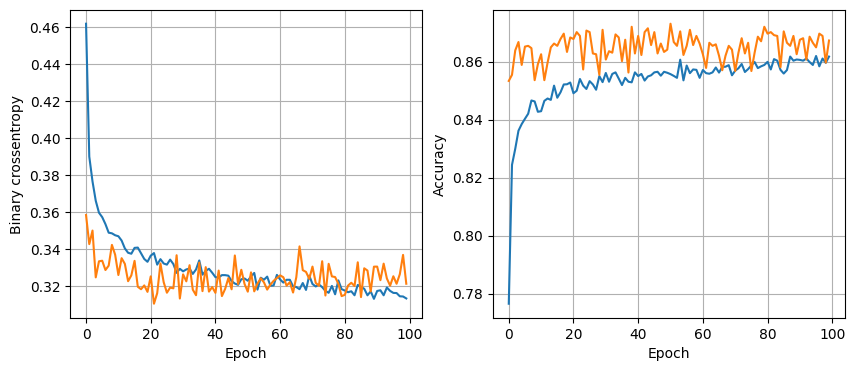

119/119 [==============================] - 0s 398us/step - loss: 0.3104 - accuracy: 0.8623
val_loss: 0.31040987372398376, time taken: 0:00:14.969730
32 nodes, 0.2 dropout, 0.005 lr, 128 batch_size


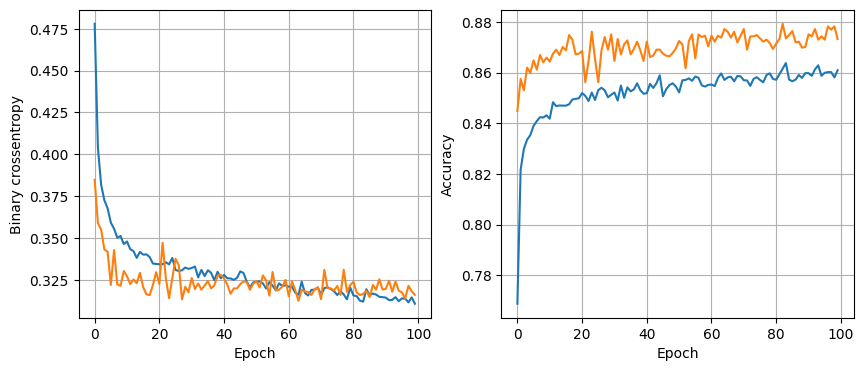

119/119 [==============================] - 0s 380us/step - loss: 0.3102 - accuracy: 0.8649
val_loss: 0.31020861864089966, time taken: 0:00:09.424514
32 nodes, 0.2 dropout, 0.001 lr, 32 batch_size


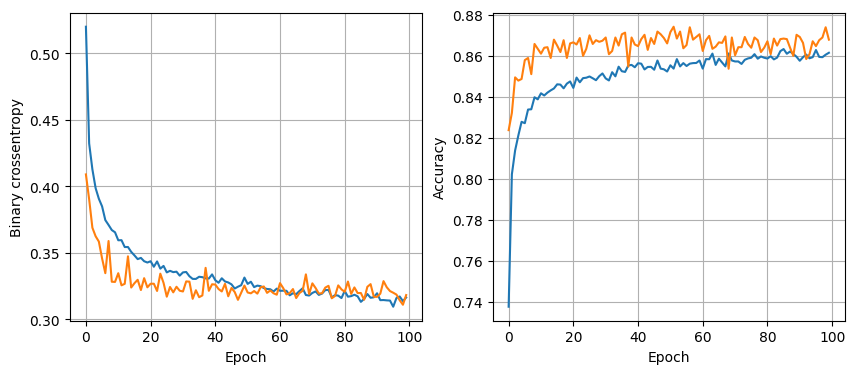

119/119 [==============================] - 0s 461us/step - loss: 0.3061 - accuracy: 0.8678
val_loss: 0.306081086397171, time taken: 0:00:29.321878
32 nodes, 0.2 dropout, 0.001 lr, 64 batch_size


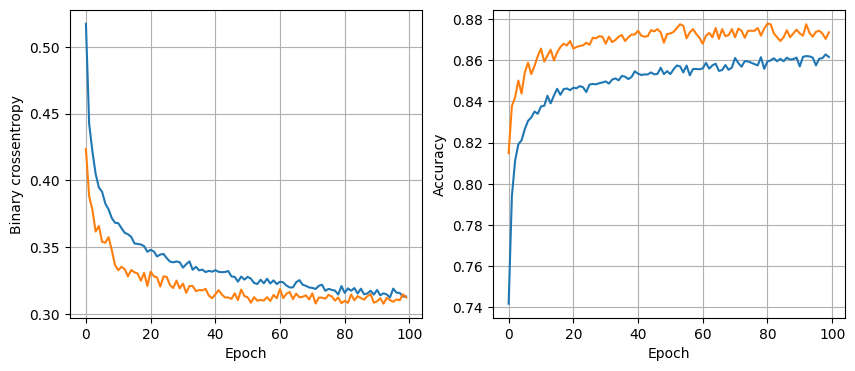

119/119 [==============================] - 0s 470us/step - loss: 0.3084 - accuracy: 0.8717
val_loss: 0.3083827495574951, time taken: 0:00:15.537260
32 nodes, 0.2 dropout, 0.001 lr, 128 batch_size


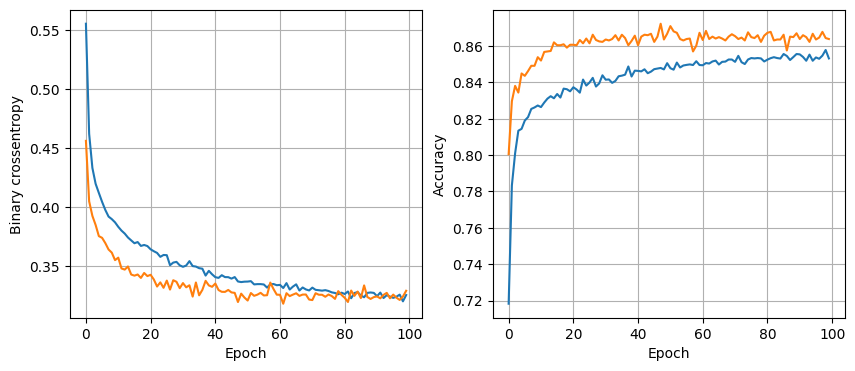

119/119 [==============================] - 0s 409us/step - loss: 0.3202 - accuracy: 0.8615
val_loss: 0.32019704580307007, time taken: 0:00:09.367362
64 nodes, 0 dropout, 0.1 lr, 32 batch_size


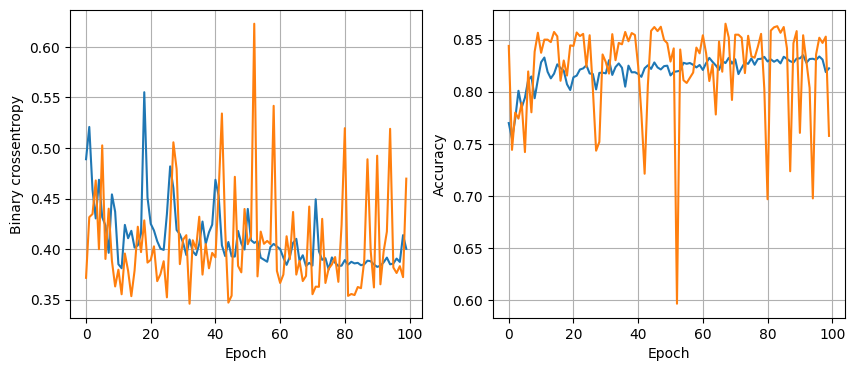

119/119 [==============================] - 0s 418us/step - loss: 0.4682 - accuracy: 0.7471
val_loss: 0.4682088792324066, time taken: 0:00:28.873498
64 nodes, 0 dropout, 0.1 lr, 64 batch_size


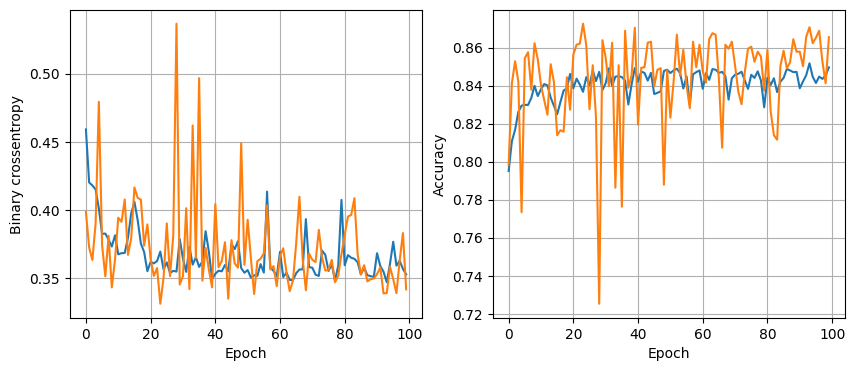

119/119 [==============================] - 0s 522us/step - loss: 0.3403 - accuracy: 0.8601
val_loss: 0.3402596712112427, time taken: 0:00:17.637274
64 nodes, 0 dropout, 0.1 lr, 128 batch_size


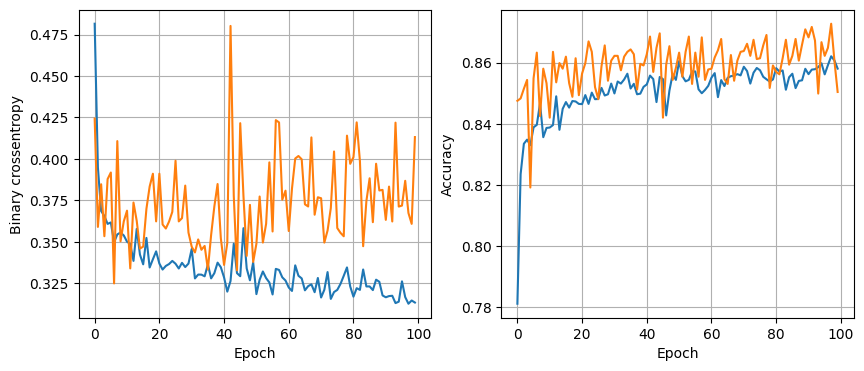

119/119 [==============================] - 0s 403us/step - loss: 0.3860 - accuracy: 0.8517
val_loss: 0.3859749138355255, time taken: 0:00:09.164204
64 nodes, 0 dropout, 0.005 lr, 32 batch_size


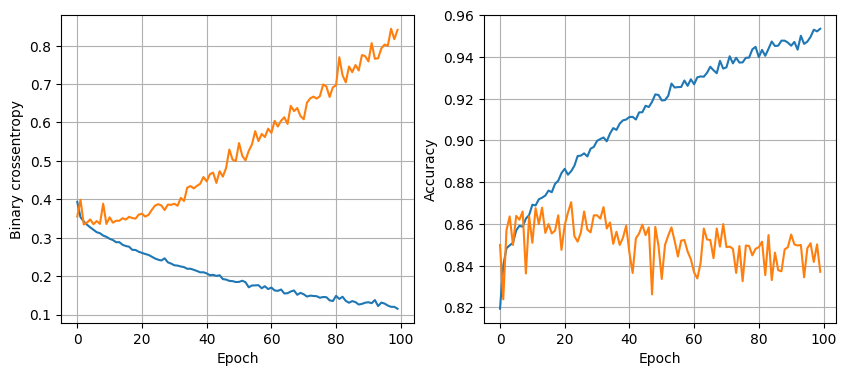

119/119 [==============================] - 0s 513us/step - loss: 0.7218 - accuracy: 0.8375
val_loss: 0.7217628359794617, time taken: 0:00:29.923774
64 nodes, 0 dropout, 0.005 lr, 64 batch_size


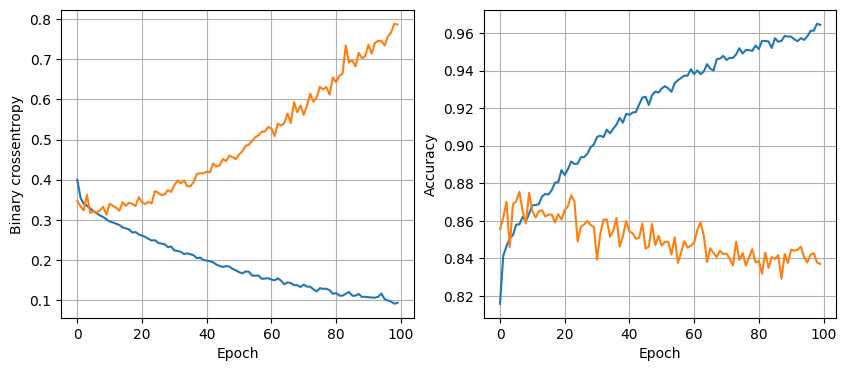

119/119 [==============================] - 0s 543us/step - loss: 0.7110 - accuracy: 0.8465
val_loss: 0.7110470533370972, time taken: 0:00:16.599796
64 nodes, 0 dropout, 0.005 lr, 128 batch_size


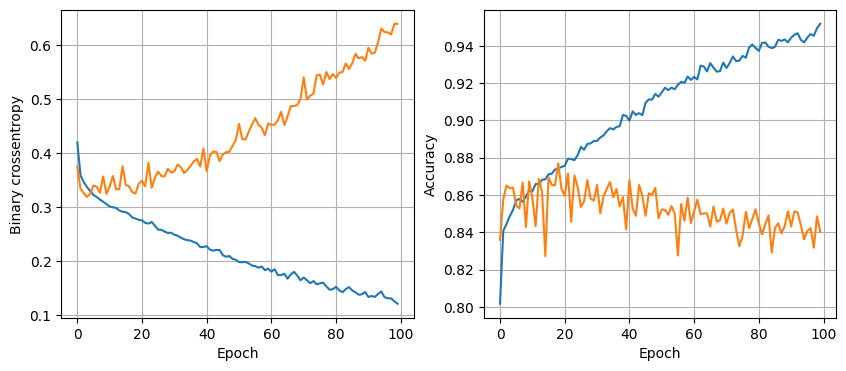

119/119 [==============================] - 0s 396us/step - loss: 0.5782 - accuracy: 0.8483
val_loss: 0.5781505703926086, time taken: 0:00:09.388702
64 nodes, 0 dropout, 0.001 lr, 32 batch_size


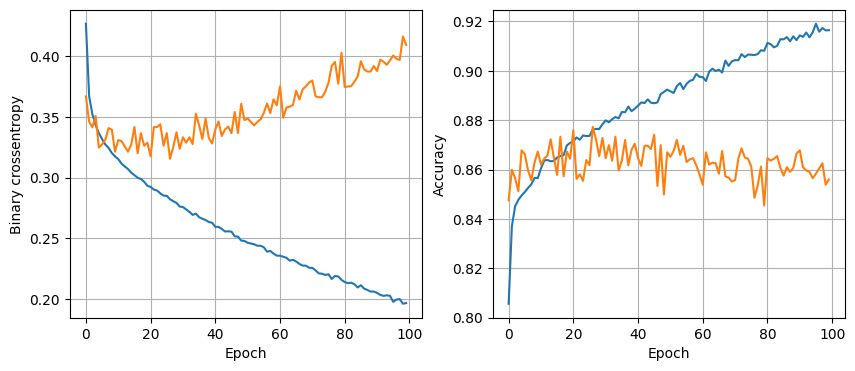

119/119 [==============================] - 0s 715us/step - loss: 0.3861 - accuracy: 0.8496
val_loss: 0.38610807061195374, time taken: 0:00:29.931786
64 nodes, 0 dropout, 0.001 lr, 64 batch_size


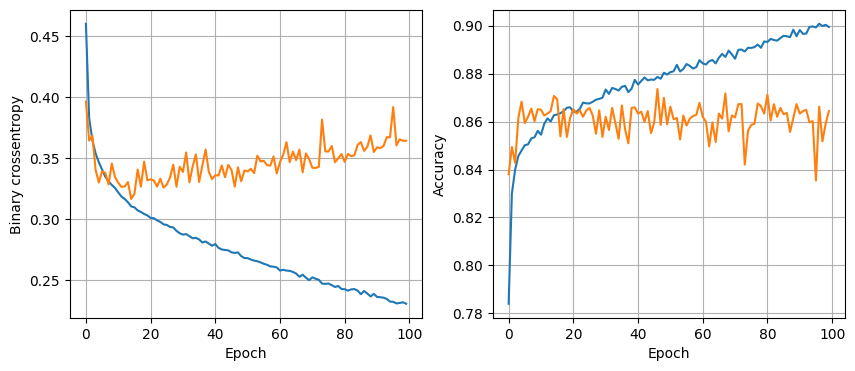

119/119 [==============================] - 0s 414us/step - loss: 0.3390 - accuracy: 0.8651
val_loss: 0.3390335142612457, time taken: 0:00:16.710489
64 nodes, 0 dropout, 0.001 lr, 128 batch_size


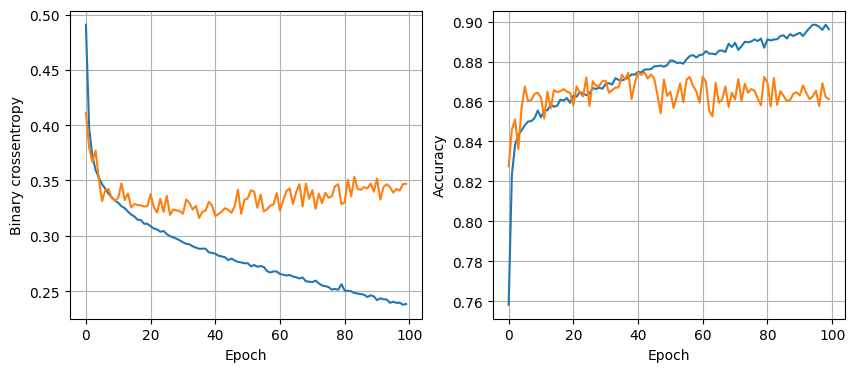

119/119 [==============================] - 0s 397us/step - loss: 0.3329 - accuracy: 0.8623
val_loss: 0.332870215177536, time taken: 0:00:09.404512
64 nodes, 0.2 dropout, 0.1 lr, 32 batch_size


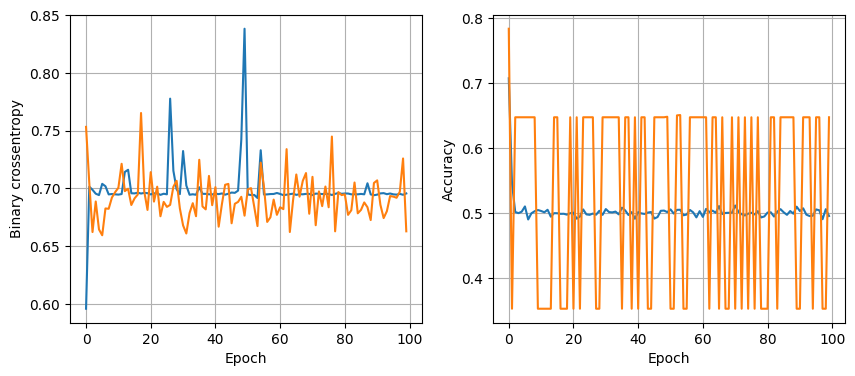

119/119 [==============================] - 0s 410us/step - loss: 0.6649 - accuracy: 0.6396
val_loss: 0.6648708581924438, time taken: 0:00:30.870927
64 nodes, 0.2 dropout, 0.1 lr, 64 batch_size


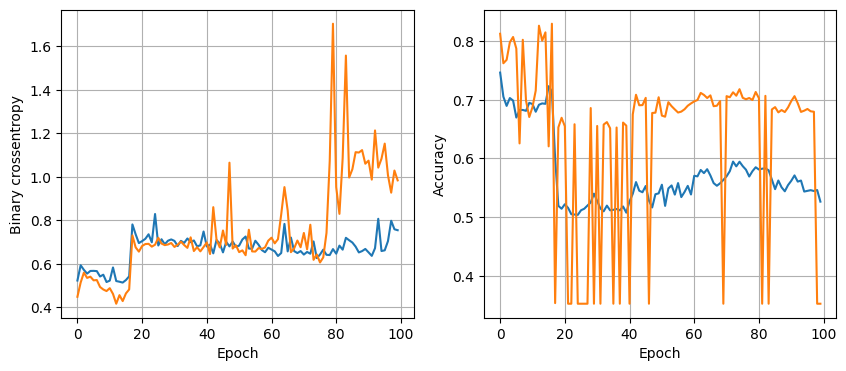

119/119 [==============================] - 0s 427us/step - loss: 0.6792 - accuracy: 0.3601
val_loss: 0.6792116165161133, time taken: 0:00:17.657011
64 nodes, 0.2 dropout, 0.1 lr, 128 batch_size


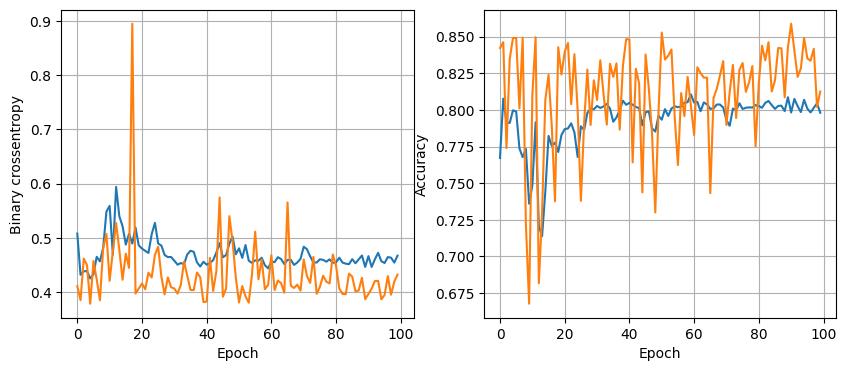

119/119 [==============================] - 0s 382us/step - loss: 0.4183 - accuracy: 0.8126
val_loss: 0.41832658648490906, time taken: 0:00:10.264706
64 nodes, 0.2 dropout, 0.005 lr, 32 batch_size


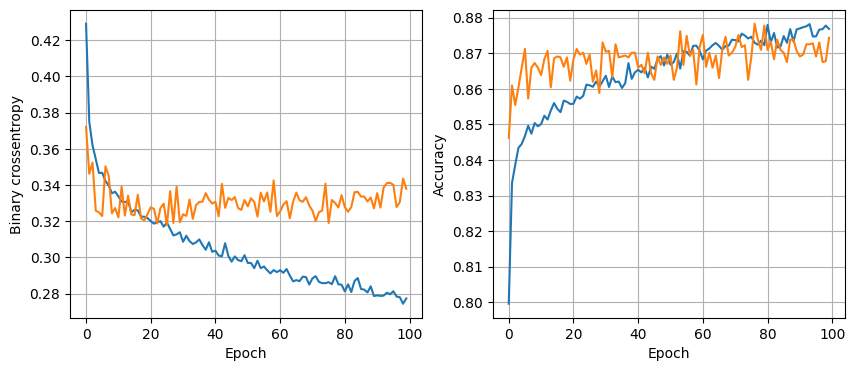

119/119 [==============================] - 0s 452us/step - loss: 0.3170 - accuracy: 0.8741
val_loss: 0.31699448823928833, time taken: 0:00:30.238569
64 nodes, 0.2 dropout, 0.005 lr, 64 batch_size


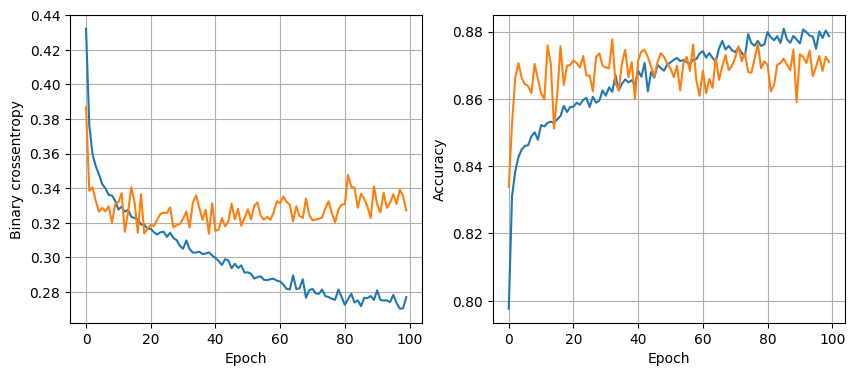

119/119 [==============================] - 0s 442us/step - loss: 0.3084 - accuracy: 0.8699
val_loss: 0.30836859345436096, time taken: 0:00:17.791930
64 nodes, 0.2 dropout, 0.005 lr, 128 batch_size


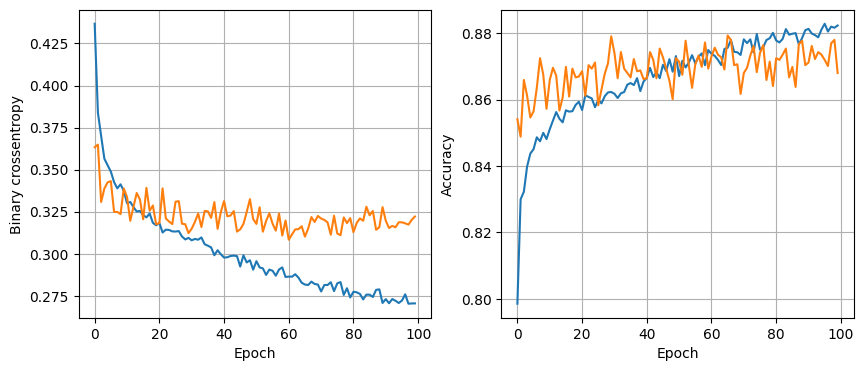

119/119 [==============================] - 0s 434us/step - loss: 0.3072 - accuracy: 0.8659
val_loss: 0.30722302198410034, time taken: 0:00:11.659456
64 nodes, 0.2 dropout, 0.001 lr, 32 batch_size


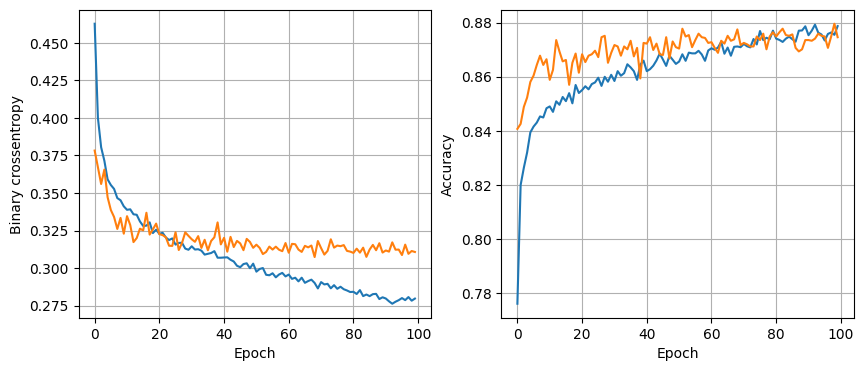

119/119 [==============================] - 0s 441us/step - loss: 0.3024 - accuracy: 0.8728
val_loss: 0.30238497257232666, time taken: 0:00:32.353145
64 nodes, 0.2 dropout, 0.001 lr, 64 batch_size


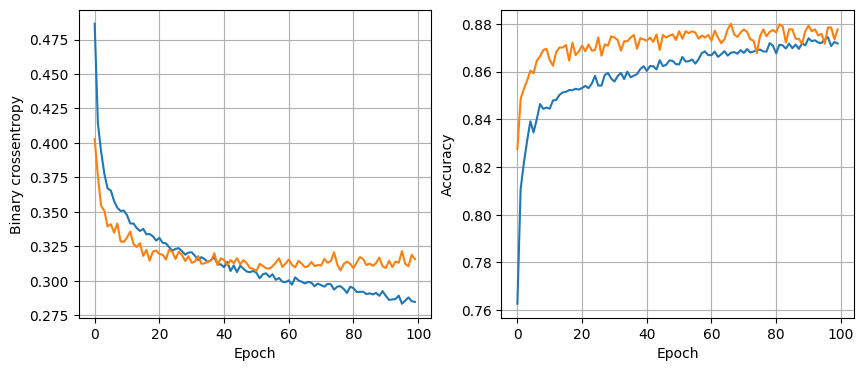

119/119 [==============================] - 0s 454us/step - loss: 0.3020 - accuracy: 0.8720
val_loss: 0.301969051361084, time taken: 0:00:18.124944
64 nodes, 0.2 dropout, 0.001 lr, 128 batch_size


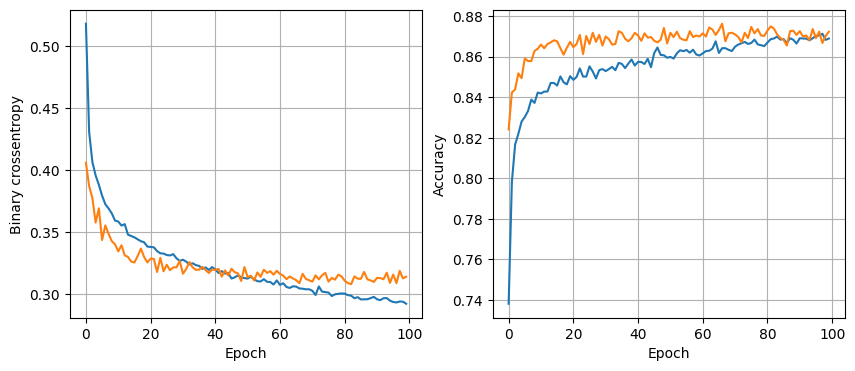

119/119 [==============================] - 0s 422us/step - loss: 0.3018 - accuracy: 0.8701
val_loss: 0.3018155097961426, time taken: 0:00:10.056036


In [18]:
from datetime import datetime

least_val_loss = float('inf')
least_val_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                start = datetime.now()
                print(f"{num_nodes} nodes, {dropout_prob} dropout, {lr} lr, {batch_size} batch_size")
                model, history = train_model(X_train, y_train, X_test, y_test, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                print(f"val_loss: {val_loss}, time taken: {datetime.now() - start}")
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_loss_model = model
        

In [20]:
y_pred = least_val_loss_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0).astype(int).reshape(-1)
print(classification_report(y_test, y_pred))

  1/119 [..............................] - ETA: 1s

119/119 [==============================] - 0s 327us/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1342
           1       0.89      0.91      0.90      2462

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

